 Random Forest, Multi-Layer Perceptron, Long-Short Term Memory Neural Networks, and LASSO regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data and extract date time information
filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

hourly_data = df['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').mean()
hourly_data = hourly_data.reset_index()
hourly_data['hour'] = hourly_data['Date'].dt.hour
hourly_data['day_of_week'] = hourly_data['Date'].dt.dayofweek
hourly_data['day_of_month'] = hourly_data['Date'].dt.day
hourly_data['month'] = hourly_data['Date'].dt.month

# Split data into features and target
features = hourly_data[['hour', 'day_of_week', 'day_of_month', 'month']]
target = hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm']


C:\Users\bober\AppData\Local\Temp\ipykernel_27692\2986266637.py:7: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
C:\Users\bober\AppData\Local\Temp\ipykernel_27692\2986266637.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['VFR_HotTank_WaterDraw_FlowRate_gpm'].resample('H').mean()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)


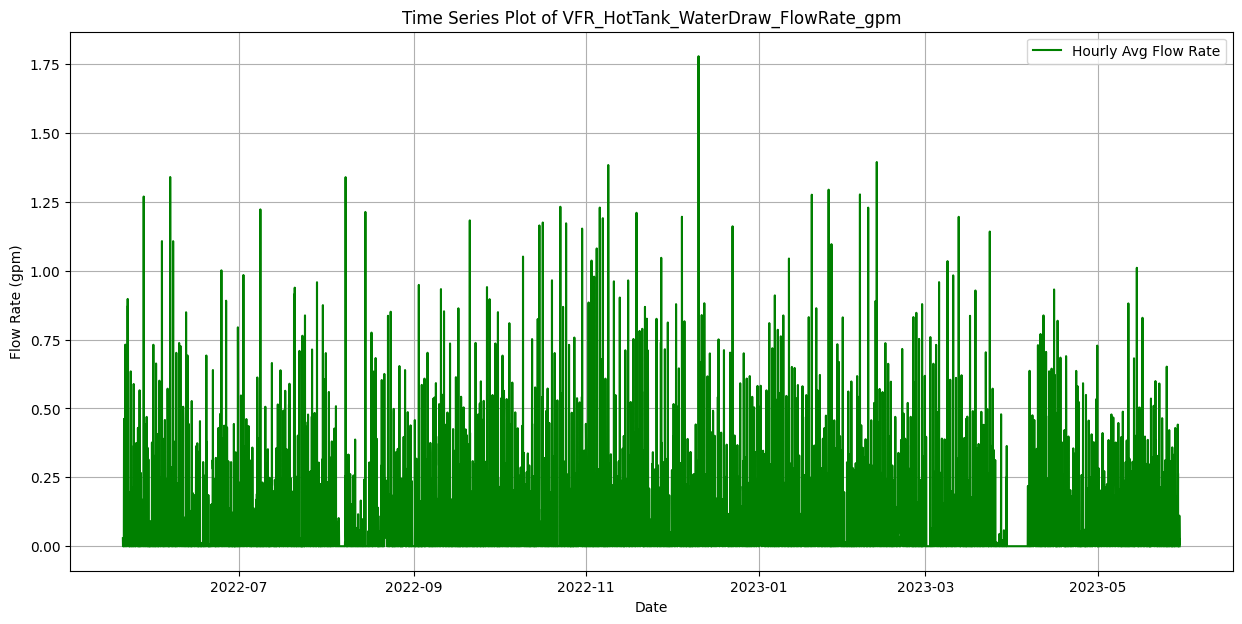

In [16]:
# Time series plot for the resampled water draw flow rate variable
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Hourly Avg Flow Rate', color='green')
plt.title('Time Series Plot of VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()


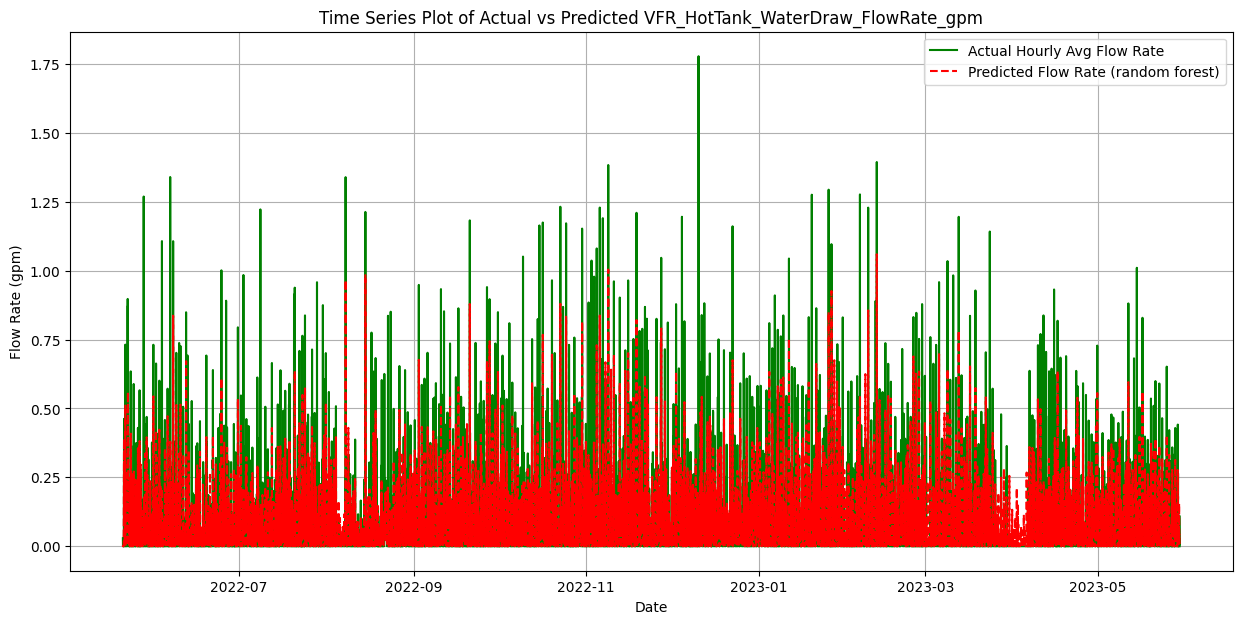

In [6]:
# Generate predictions for the entire dataset
all_features = features  # features were defined previously for the entire dataset
all_predictions = rf_regressor.predict(all_features)

# Add predictions to the hourly data DataFrame for plotting
hourly_data['Predicted_FlowRate_gpm'] = all_predictions

# Time series plot for actual vs predicted flow rates
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['Predicted_FlowRate_gpm'], label='Predicted Flow Rate (random forest)', linestyle='--', color='red')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()


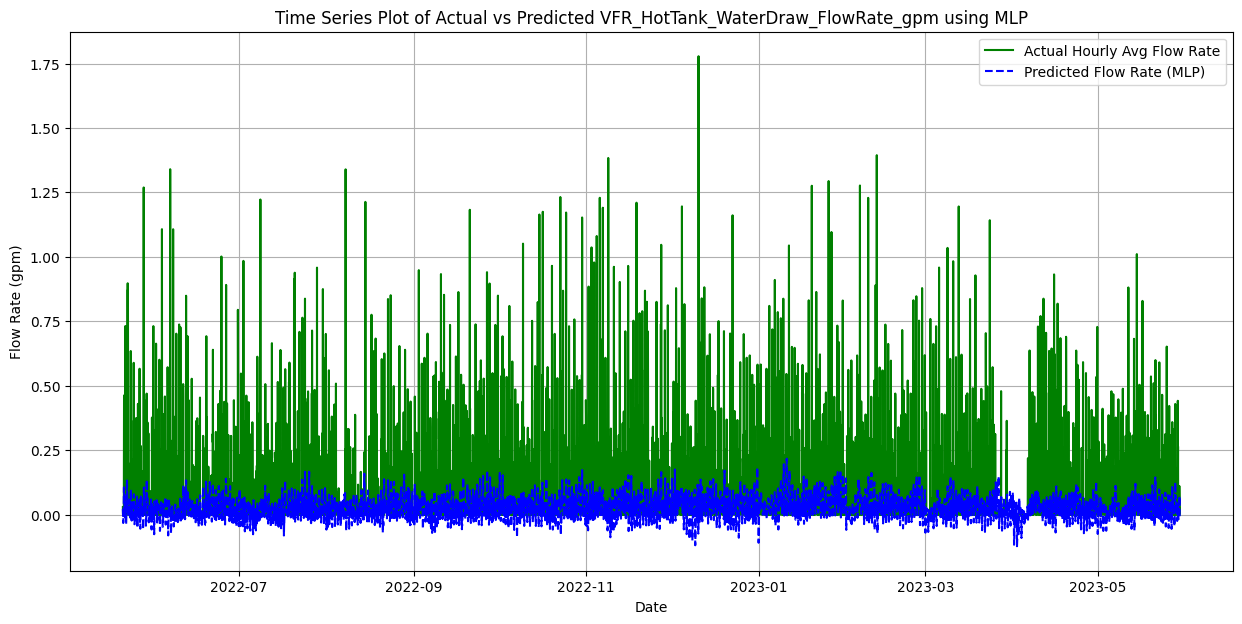

In [7]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
                             learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                             random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                             nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
                             beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Train the MLP regressor
mlp_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_regressor.predict(X_test)

# Add MLP predictions to the hourly data DataFrame for plotting
hourly_data['MLP_Predicted_FlowRate_gpm'] = mlp_regressor.predict(features)

# Time series plot for actual vs predicted flow rates using MLP
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['MLP_Predicted_FlowRate_gpm'], label='Predicted Flow Rate (MLP)', linestyle='--', color='blue')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm using MLP')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error for LASSO: 0.026320101331058193


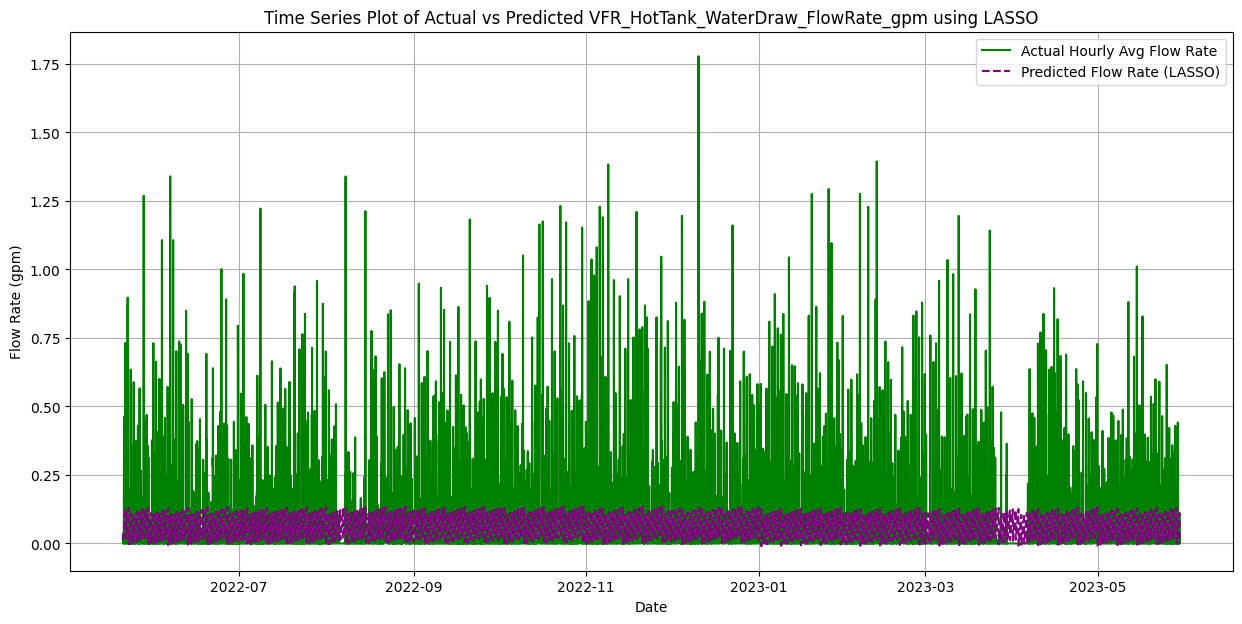

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Perform grid search to find the optimal alpha value
lasso_regressor = Lasso(random_state=42)
grid = GridSearchCV(lasso_regressor, alpha_values, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_scaled, y_train)

# Use the best estimator to make predictions
lasso_regressor = grid.best_estimator_
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

# Calculate the mean squared error
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error for LASSO: {mse_lasso}")

# Add LASSO predictions to the hourly data DataFrame for plotting
hourly_data['LASSO_Predicted_FlowRate_gpm'] = lasso_regressor.predict(scaler.transform(features))

# Time series plot for actual vs predicted flow rates using LASSO
plt.figure(figsize=(15, 7))
plt.plot(hourly_data['Date'], hourly_data['VFR_HotTank_WaterDraw_FlowRate_gpm'], label='Actual Hourly Avg Flow Rate', color='green')
plt.plot(hourly_data['Date'], hourly_data['LASSO_Predicted_FlowRate_gpm'], label='Predicted Flow Rate (LASSO)', linestyle='--', color='purple')
plt.title('Time Series Plot of Actual vs Predicted VFR_HotTank_WaterDraw_FlowRate_gpm using LASSO')
plt.xlabel('Date')
plt.ylabel('Flow Rate (gpm)')
plt.legend()
plt.grid(True)
plt.show()